[Reference](https://medium.com/@abhishek.chaudhari85/the-kalman-filter-is-an-algorithm-that-tracks-an-object-in-state-space-fd3395dbfded)

# Step 1: Get stock price data with the OpenBB SDK

In [2]:
!pip install pykalman

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 KB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48463 sha256=4ab8e951fbdf5d9863486e241115a6b1f267dfbef6506040224feeba4d2aceaa
  Stored in directory: /root/.cache/pip/wheels/11/16/21/615e29f0001ed6258b25d2a3a84ccfd65c5469b3505d4ab3ab
Successfully built pykalman


In [7]:
!pip install openbb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.4/386.4 KB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.8/892.8 KB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [12]:
!pip uninstall matplotlib
!python -m pip install --upgrade pip
!pip install matplotlib

Found existing installation: matplotlib 3.6.3
Uninstalling matplotlib-3.6.3:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.3-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.3.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
E

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
from openbb_terminal.sdk import openbb

Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://docs.openbb.co/sdk/quickstart/installation/

In [2]:
data = openbb.stocks.load("LMT", start_date="2013-01-01", end_date="2015-01-01")
prices = data["Adj Close"]

Loading Daily data for LMT with starting period 2013-01-02.

# Step 2: Build a smoothed average with the Kalman filter

In [3]:
kf = KalmanFilter(
    transition_matrices = [1],
    observation_matrices = [1],
    initial_state_mean = 0,
    initial_state_covariance = 1,
    observation_covariance=1,
    transition_covariance=0.01
)

In [4]:
state_means, _ = kf.filter(prices.values)
state_means = pd.Series(state_means.flatten(), index=prices.index)

Text(0, 0.5, 'Price')

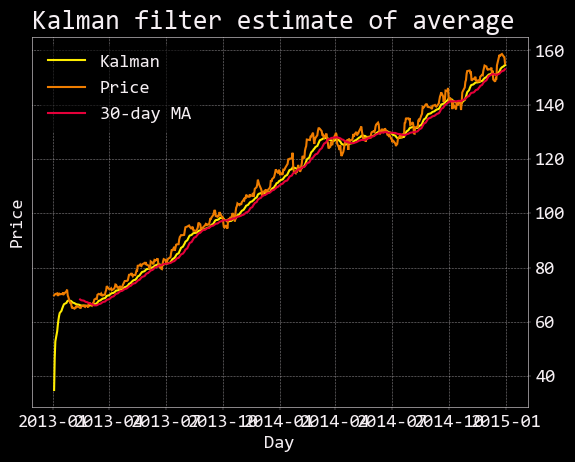

In [5]:
mean30 = prices.rolling(window=30).mean()
plt.plot(state_means)
plt.plot(prices)
plt.plot(mean30)
plt.title('Kalman filter estimate of average')
plt.legend(['Kalman', 'Price', '30-day MA'])
plt.xlabel('Day')
plt.ylabel('Price')

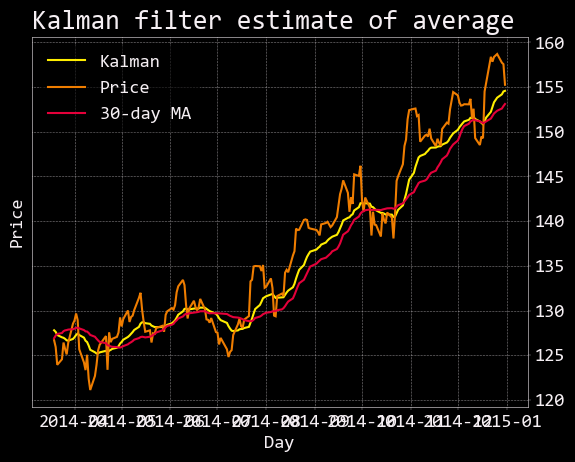

In [6]:
plt.plot(state_means[-200:])
plt.plot(prices[-200:])
plt.plot(mean30[-200:])
plt.title('Kalman filter estimate of average')
plt.legend(['Kalman', 'Price', '30-day MA'])
plt.xlabel('Day')
plt.ylabel('Price');